# How many wraiths are there in the Necropolis of Warsaw?
## Part 1. Date of Death

### Setup

Locate the `src` directory and attach it to `sys.path`.

In [10]:
from pathlib import Path
import sys


def project_path_iter():
    for p in Path.cwd().parts:
        if p == PROJECT_NAME:
            yield p
            return
        yield p


REPO_NAME = 'data-science-playground'
REPO_PATH = Path(*project_path_iter())
SRC_PATH = REPO_PATH / 'src'
PROJECT_PATH = REPO_PATH / 'how_many_wraiths'

if SRC_PATH not in sys.path:
    sys.path.append(str(SRC_PATH))

## Input data

Sources:
1. [Demography of Warsaw (Wikipedia; in Polish)](
https://pl.wikipedia.org/wiki/Ludno%C5%9B%C4%87_Warszawy) 
2. [Historical demography of Poland (academic pdf; in Polish)](
http://mbc.cyfrowemazowsze.pl/Content/18436/Historia%20Polski%20w%20Liczbach_1994%20198147.pdf)

In [11]:
from utils.timeline import Timeline
from utils.interpolations import build_timeline_interpolation


tl = Timeline.load(str(PROJECT_PATH / 'how_many_wraiths_timeline.yaml'))
START_YEAR = tl.start
END_YEAR = tl.end

year_list = list(range(START_YEAR, END_YEAR + 1))

alive_population = build_timeline_interpolation(tl, 'alive')
mortality_rate = build_timeline_interpolation(tl, 'mortality_rate')
enfant_oblivion_rate = build_timeline_interpolation(tl, 'enfant_oblivion_rate')
senior_oblivion_rate = build_timeline_interpolation(tl, 'senior_oblivion_rate')
additional_deaths = tl.property('additional_deaths')

## Model

In [12]:
def population_per_dod(t, dod):
    if t < START_YEAR:
        return 0
    if t == dod:
        return int(natural_growth(t) * enfant_survavibility_factor(t))
    return int(population_per_dod(t - 1, dod) * (1 - pass_away_factor(t) + migration_factor(t)))


def pass_away_factor(t):
    return 0


def migration_factor(t):
    return 0


def population(t):
    return sum(population_per_dod(t, dod) for dod in range(START_YEAR, t + 1))


def natural_growth(t):
    return int(alive_population(t) * mortality_rate(t) * wraith_turn_factor(t))


def wraith_turn_factor(t):
    return 0.8
    

def enfant_survavibility_factor(t):
    rate = 1 - enfant_oblivion_rate(t) - enfant_decorpsing_rate(t)
    return rate if rate > 0 else 0


def enfant_oblivion_rate(t):
    return 0.1


def enfant_decorpsing_rate(t):
    return 0.1


def pass_away_rate(t):
    rate = senior_oblivion_rate(t) + senior_ascension_rate(t) + senior_decorpsing_rate(t)
    return rate if rate < 1 else 1


def senior_oblivion_rate(t):
    return 0.02


def senior_ascension_rate(t):
    return 0.01


def senior_decorpsing_rate(t):
    return 0.01

## Visualization

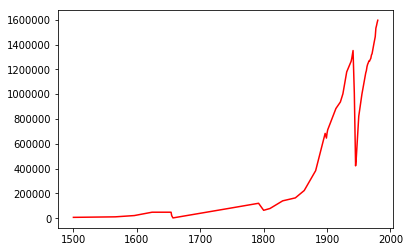

In [13]:
import matplotlib.pyplot as plt

alive_population_values = list(alive_population(year_list))

# population_full_values = {(t, dod): population_per_dod(t, dod) for t in year_list for dod in year_list}
# population_datapoints = (year_list, list(population_per_dod(END_YEAR, dod) for dod in year_list))

plt.plot(year_list, alive_population_values, 'r-')  #, *population_datapoints, 'b-')
plt.show()